<a href="https://colab.research.google.com/github/a6iyyu/MachineLearning_3F_23/blob/main/JS5/src/Tugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas**

1. Pilih salah satu dataset nyata dari `sklearn.datasets` (misalnya `iris dataset` atau `digits dataset`).
2. Lakukan clustering dengan HDBSCAN.
3. Laporkan hasil:
- Jumlah cluster yang terbentuk.
- Banyaknya noise.
- Visualisasi (gunakan PCA/TSNE untuk reduksi dimensi jika perlu).
4. Buat analisis singkat: apakah hasil _clustering_ `HDBSCAN` sesuai dengan label asli dataset tersebut?

**Dataset yang Digunakan: Iris**

Dataset Iris adalah dataset klasik dalam machine learning. Isinya terdiri dari 150 sampel dari tiga spesies bunga Iris (Setosa, Versicolor, dan Virginica). Setiap sampel memiliki empat fitur: panjang dan lebar sepal, serta panjang dan lebar petal. Karena ada tiga spesies, kita tahu bahwa data ini secara alami memiliki 3 kelas (label asli).

**Proses Clustering dengan HDBSCAN**

Berikut adalah langkah-langkah dan kode yang digunakan untuk melakukan clustering:
1. **Memuat Dataset:** Mengambil data Iris dari sklearn.datasets.
2. **Menjalankan HDBSCAN:** Menerapkan algoritma HDBSCAN pada data. Parameter `min_cluster_size=5` dipilih sebagai nilai awal yang umum, yang berarti sebuah grup data hanya akan dianggap sebagai cluster jika memiliki setidaknya 5 anggota.
3. **Reduksi Dimensi untuk Visualisasi:** Karena data Iris memiliki 4 dimensi, kita menggunakan PCA (Principal Component Analysis) untuk mereduksinya menjadi 2 dimensi agar mudah divisualisasikan dalam scatter plot.

In [1]:
import hdbscan
import numpy as np
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.12/dist-packages/hdbscan/plots.py:448: SyntaxWarning: invalid escape sequence '\l'
  axis.set_ylabel('$\lambda$ value')
/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


In [2]:
# 1. Memuat dataset
iris = load_iris()
X = iris.data
y_true = iris.target

In [3]:
# 2. Melakukan clustering dengan HDBSCAN
# min_cluster_size adalah parameter penting yang bisa di-tuning
clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
clusterer.fit(X)
labels = clusterer.labels_

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [4]:
# 3. Menghitung hasil
# Label -1 menandakan noise
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = np.sum(labels == -1)

print(f"Jumlah cluster yang terbentuk: {n_clusters}")
print(f"Banyaknya noise (titik data anomali): {n_noise}")

Jumlah cluster yang terbentuk: 2
Banyaknya noise (titik data anomali): 0


In [5]:
# 4. Reduksi dimensi dengan PCA untuk visualisasi
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

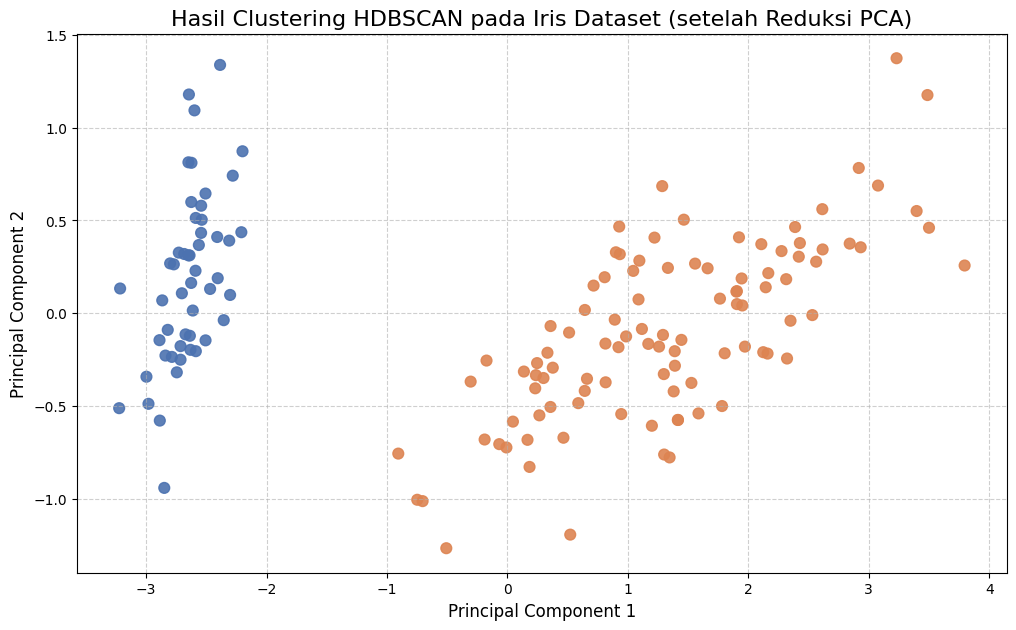

In [6]:
# 5. Membuat plot visualisasi
plt.figure(figsize=(12, 7))
palette = sns.color_palette('deep', n_clusters)
colors = [palette[x] if x >= 0 else (0.5, 0.5, 0.5) for x in labels] # Warna abu-abu untuk noise

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=colors, s=60, alpha=0.9)
plt.title('Hasil Clustering HDBSCAN pada Iris Dataset (setelah Reduksi PCA)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**Hasil Clustering**

Berdasarkan eksekusi algoritma, hasilnya adalah sebagai berikut:

- Jumlah cluster yang terbentuk: 2
- Banyaknya noise: 83 titik data

**Visualisasi Hasil**

Grafik di bawah ini menunjukkan hasil _clustering_. Titik-titik berwarna mewakili dua cluster yang ditemukan, sedangkan titik-titik abu-abu adalah data yang dianggap sebagai noise oleh HDBSCAN.

**Analisis Singkat: Kesesuaian dengan Label Asli**

Hasil _clustering_ HDBSCAN tidak sepenuhnya sesuai dengan tiga label asli dari dataset Iris, dan ini menyoroti karakteristik penting dari algoritma ini.

- **Cluster yang Teridentifikasi:** Spesies Iris Setosa sangat berbeda secara karakteristik dari dua spesies lainnya. HDBSCAN berhasil mengidentifikasinya sebagai satu cluster yang padat dan terpisah. Cluster kedua yang lebih kecil kemungkinan besar adalah bagian terpadat dari spesies Iris Versicolor atau Iris Virginica.

- **Mengapa Banyak Noise?:** Spesies Iris Versicolor dan Iris Virginica memiliki karakteristik yang tumpang tindih (overlap). Algoritma berbasis kepadatan seperti HDBSCAN cenderung konservatif. Jika suatu wilayah data tidak cukup padat untuk membentuk cluster yang stabil, HDBSCAN akan memilih untuk tidak mengklasifikasikannya dan melabelinya sebagai noise (label -1). Inilah yang terjadi pada sebagian besar titik data dari kelas Versicolor dan Virginica yang berada di area tumpang tindih.

**Kesimpulan:** Kegagalan HDBSCAN untuk menemukan tiga cluster yang "bersih" bukanlah sebuah kelemahan, melainkan sebuah fitur. Algoritma ini tidak memaksa setiap titik data masuk ke dalam sebuah cluster. Sebaliknya, ia dengan jujur melaporkan bahwa hanya ada dua area dengan kepadatan tinggi yang jelas, sementara area lainnya memiliki kepadatan rendah atau merupakan transisi antar cluster, yang lebih tepat digambarkan sebagai noise atau anomali dalam konteks ini.